<a href="https://www.kaggle.com/code/averma111/pytorch-icr?scriptVersionId=129221194" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import torch
import warnings
warnings.filterwarnings('ignore')
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
sns.set_style("darkgrid")
pd.set_option('mode.chained_assignment',None)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/icr-identify-age-related-conditions/sample_submission.csv
/kaggle/input/icr-identify-age-related-conditions/greeks.csv
/kaggle/input/icr-identify-age-related-conditions/train.csv
/kaggle/input/icr-identify-age-related-conditions/test.csv


In [2]:
def get_datasets(path):
    return pd.read_csv(path)


train_path='/kaggle/input/icr-identify-age-related-conditions/train.csv'
test_path ='/kaggle/input/icr-identify-age-related-conditions/test.csv'
greeks_path = '/kaggle/input/icr-identify-age-related-conditions/greeks.csv'

In [3]:
get_datasets(train_path).head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [4]:
get_datasets(greeks_path).head()

,Id,Alpha,Beta,Gamma,Delta,Epsilon
0,000ff2bfdfe9,B,C,G,D,3/19/2019
1,007255e47698,A,C,M,B,Unknown
2,013f2bd269f5,A,C,M,B,Unknown
3,043ac50845d5,A,C,M,B,Unknown
4,044fb8a146ec,D,B,F,B,3/25/2020


In [5]:
get_datasets(test_path).head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,00eed32682bb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,010ebe33f668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,02fa521e1838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,040e15f562a2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,046e85c7cc7f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
def summary(text, df):
    print(f'{text} shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summ['null'] = df.isnull().sum()
    summ['unique'] = df.nunique()
    summ['min'] = df.min()
    summ['median'] = df.median()
    summ['max'] = df.max()
    summ['mean'] = df.mean()
    summ['std'] = df.std()
    summ['duplicate'] = df.duplicated().sum()
    return summ

## Summary of train dataset 

* There are no duplicates.
* BQ,CB,CC,DU,EL,FC,FL,FS and GL are nulls
* All the features are in float

In [26]:
summary('train',get_datasets(train_path))

train shape: (617, 58)


,dtypes,null,unique,min,median,max,mean,std,duplicate
Id,object,0,617,000ff2bfdfe9,NaN,ffcca4ded3bb,NaN,NaN,0
AB,float64,0,217,0.081187,0.354659,6.161666,0.477149,0.468388,0
AF,float64,0,599,192.59328,3120.318960,28688.18766,3502.013221,2300.322717,0
AH,float64,0,227,85.200147,85.200147,1910.123198,118.624513,127.838950,0
AM,float64,0,605,3.177522,20.533110,630.51823,38.968552,69.728226,0
AR,float64,0,130,8.138688,8.138688,178.943634,10.128242,10.518877,0
AX,float64,0,427,0.699861,5.031912,38.27088,5.545576,2.551696,0
AY,float64,0,148,0.025578,0.025578,10.315851,0.060320,0.416817,0
AZ,float64,0,484,3.396778,10.461320,38.971568,10.566447,4.350645,0
BC,float64,0,259,1.2299,1.229900,1463.693448,8.053012,65.166943,0


In [27]:
def replace_null_with_mean(df,column):
    return df.fillna(df[column].mean(),axis =1, inplace = True)


column =['BQ','CB','CC','DU','EL','FC','FL','FS','GL']
[replace_null_with_mean(get_datasets(train_path),col) for col in column]

[None, None, None, None, None, None, None, None, None]

<AxesSubplot: xlabel='Class', ylabel='count'>

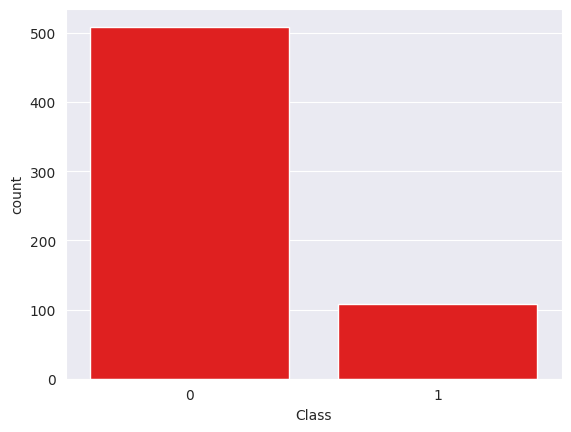

In [28]:
sns.countplot(get_datasets(train_path),x='Class',color='r')


In [29]:
def to_numerical(df,column):
    encoding = {
        'A':0,
        'B':1
    }
    df = get_datasets(train_path)
    for values in df[column]:
        if values =='A':
            df[column] = encoding['A']
        else:
            df[column] = encoding['B']
    return df

train = to_numerical(get_datasets(train_path),'EJ')

In [30]:
def drop_column(df,column):
    df.drop(columns=column,axis=1,inplace=True)
    return df

X = drop_column(train,'Id').iloc[:,1:]
y = train.iloc['Class']


TypeError: Cannot index by location index with a non-integer key

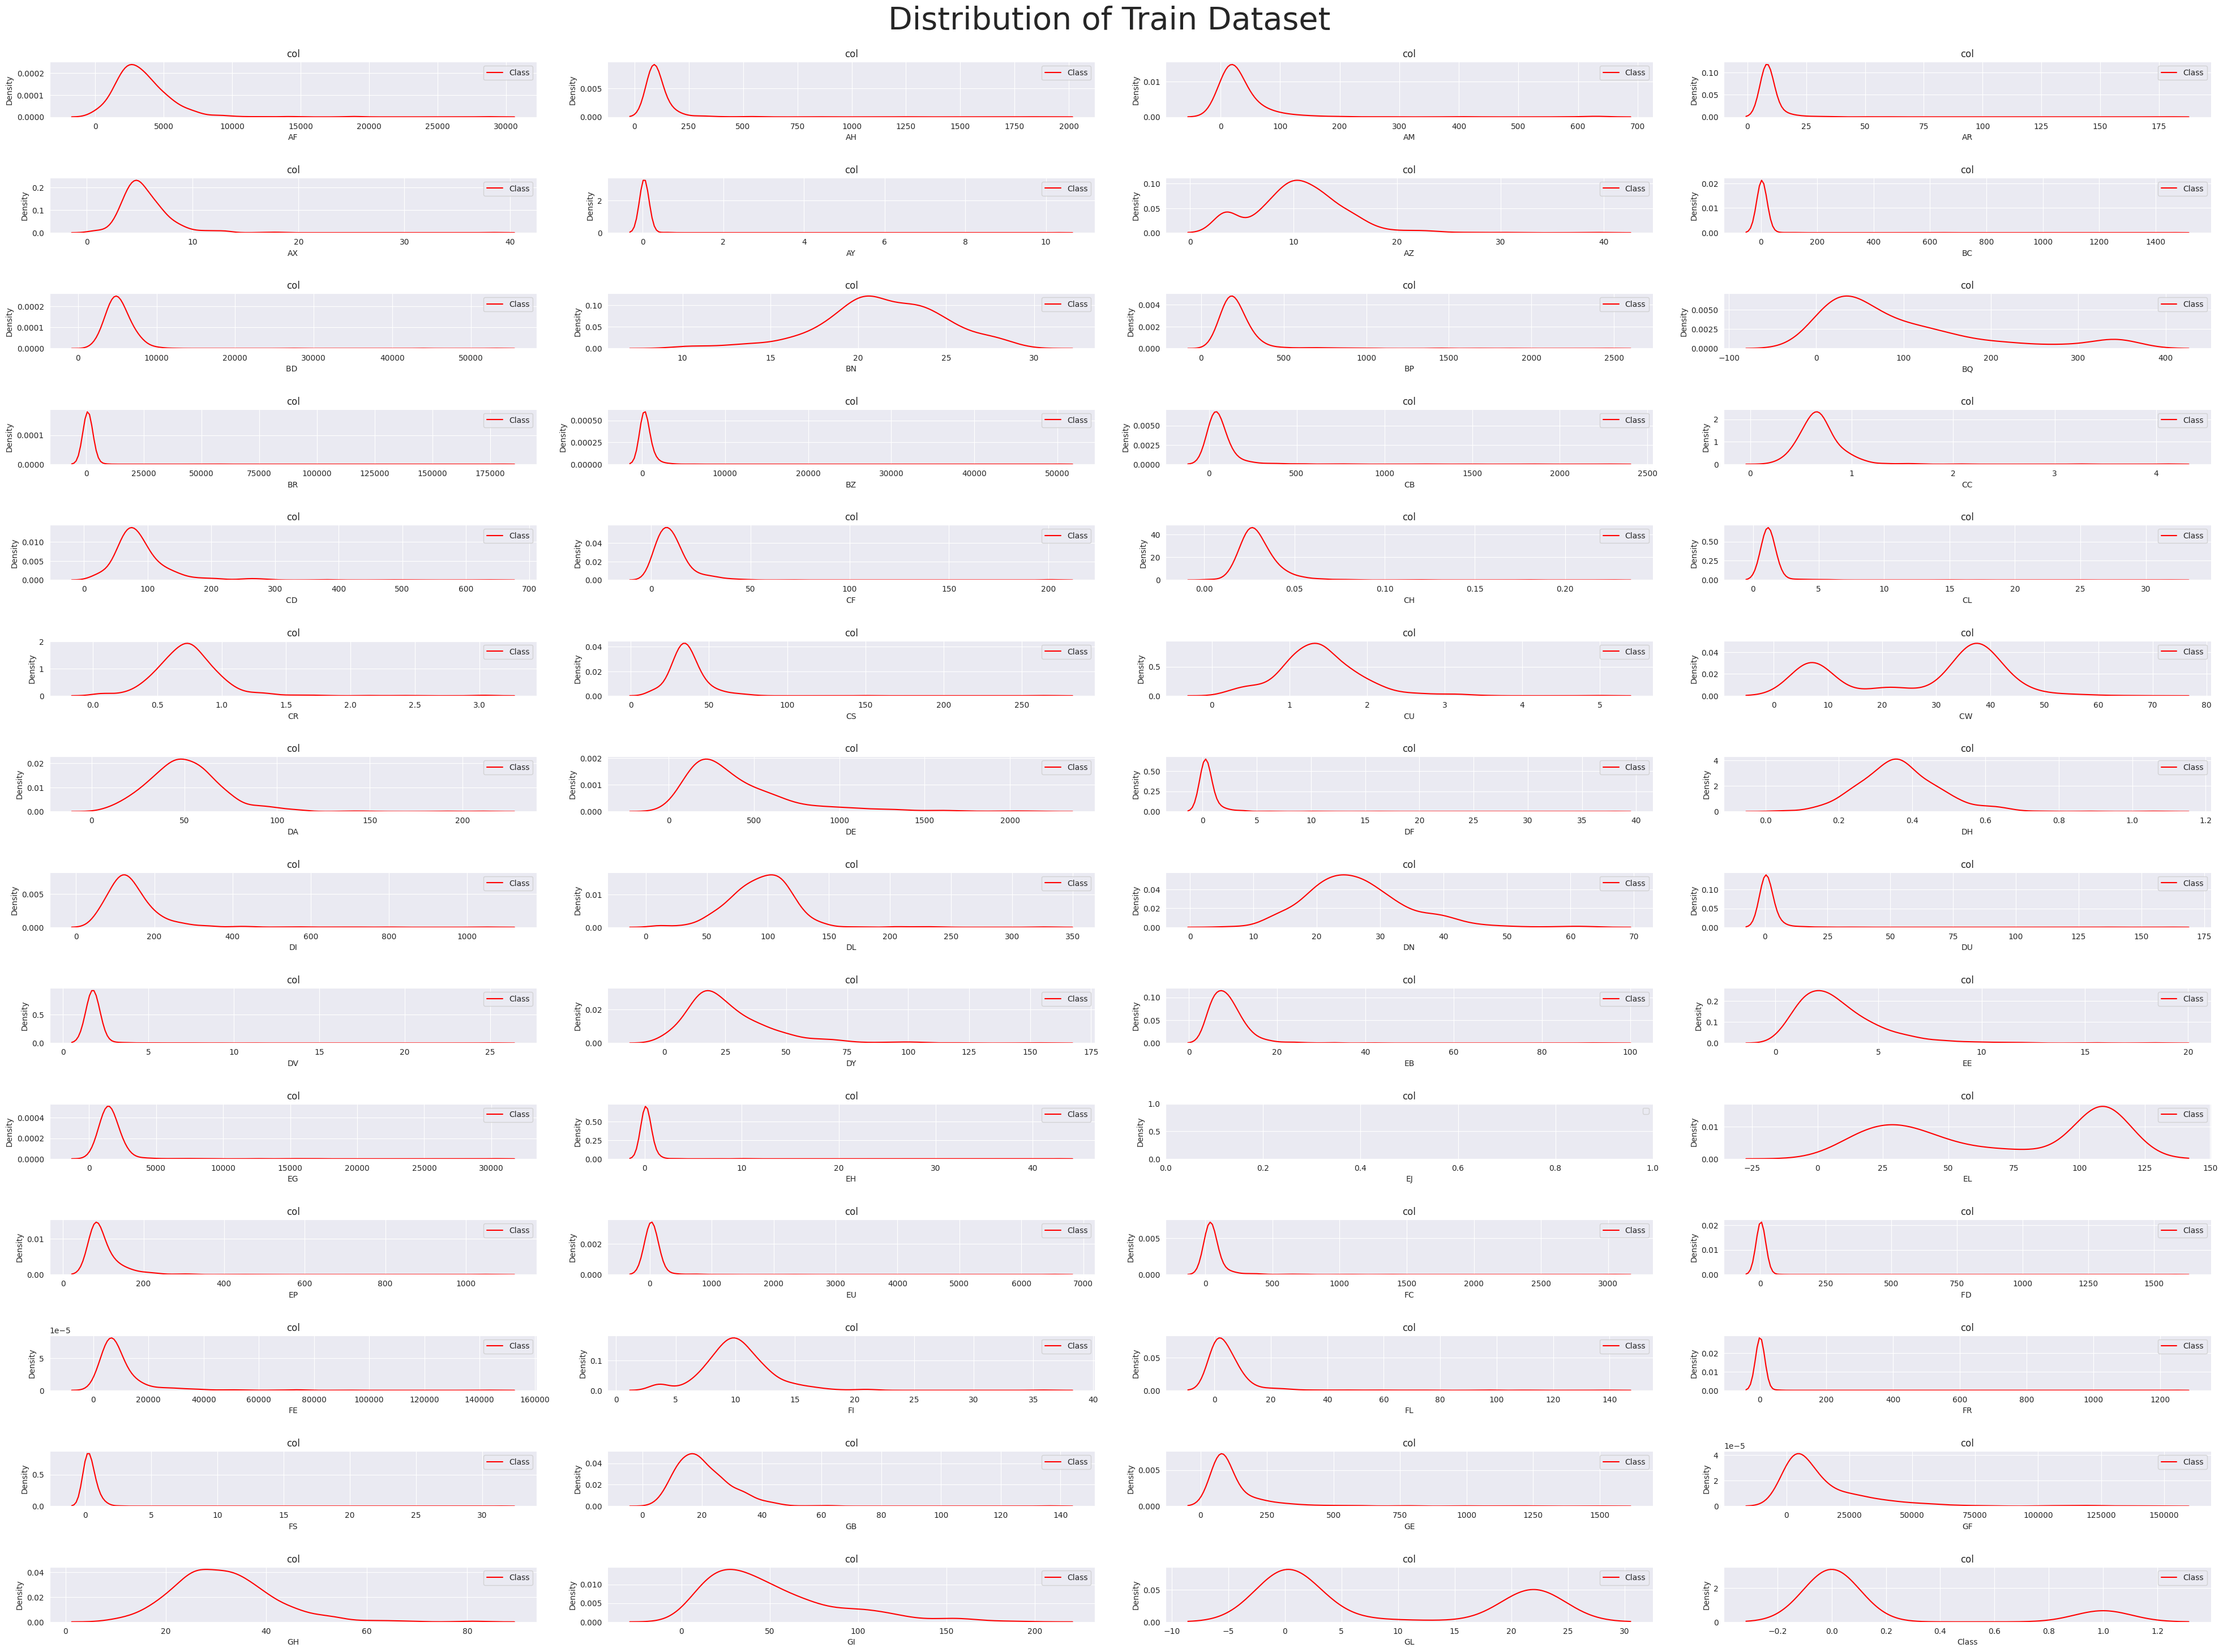

In [35]:
def plot_kde_train(features):
    fig,ax = plt.subplots(int(np.ceil(len(features.columns)/4)),4, figsize = (40,30))
    for i,col in enumerate(features.columns):
        ax = np.ravel(ax)
        sns.kdeplot(x= features[col] , label = 'Class', ax = ax[i],color='r')
        ax[i].legend()
        ax[i].set_title(f"col")

    plt.suptitle("Distribution of Train Dataset",fontsize = 40)
    plt.tight_layout(pad =3)
    plt.show()
    
plot_kde_train(X)